### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# New libraries
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
df = pd.read_csv("vehicle.csv")

In [3]:
df.shape

(846, 19)

In [4]:
df[df.isnull().any(axis=1)].shape

(33, 19)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(813, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,813,NaN,NaN,NaN,93.6568,8.23375,73,87,93,100,119
circularity,813,NaN,NaN,NaN,44.8032,6.14666,33,40,44,49,59
distance_circularity,813,NaN,NaN,NaN,82.0431,15.7831,40,70,79,98,112
radius_ratio,813,NaN,NaN,NaN,169.098,33.6154,104,141,167,195,333
pr.axis_aspect_ratio,813,NaN,NaN,NaN,61.7749,7.973,47,57,61,65,138
max.length_aspect_ratio,813,NaN,NaN,NaN,8.59902,4.67717,2,7,8,10,55
scatter_ratio,813,NaN,NaN,NaN,168.563,33.0822,112,146,157,198,265
elongatedness,813,NaN,NaN,NaN,40.9889,7.80338,26,33,43,46,61
pr.axis_rectangularity,813,NaN,NaN,NaN,20.5584,2.57318,17,19,20,23,29
max.length_rectangularity,813,NaN,NaN,NaN,147.892,14.5046,118,137,146,159,188


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [9]:
df['class'].value_counts(normalize=True)

car    0.507995
bus    0.252153
van    0.239852
Name: class, dtype: float64

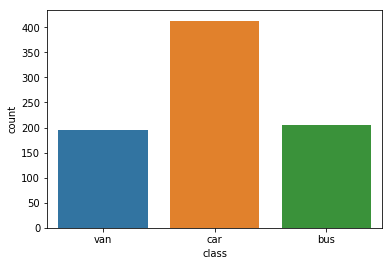

In [10]:
sns.countplot(x='class', data=df)
# 50% Cars, 25% bus and about 24% vans

### Check for any missing values in the data 

In [11]:
# Already dropped na values before

### 3. Standardize the data 

In [12]:
X = df.drop(['class'], axis=1).apply(st.zscore)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [13]:
distortions = []

You can later use this array to plot the elbow plot

In [14]:
model_kmean = KMeans(n_clusters=3, random_state=17).fit(X)
sum(np.min(cdist(X, model_kmean.cluster_centers_, metric='euclidean'), axis=1)**2 / (X.shape[0]))

8.656171457094802

### 5. Calculating distortion - C distance

In [15]:
K = range(1, 11)
for k in K:
    model_kmean = KMeans(n_clusters=k, random_state=17).fit(X)
    distortions.append(sum(np.min(cdist(X, model_kmean.cluster_centers_, metric='euclidean'), axis=1)**2 / (X.shape[0])))
    print("Step- ", k , " Distorations", distortions)

# We start with k = 1 (no. of clusters = 1) to k = 10 (no. of clusters = 10) and measure Total Distoration
# Eventually we end up with following information (Distortation number may differ from actual due to randomness)
# So the thing to observe is as we increase number of clusters, the Distortation is keeps reducing.
# Initial iterations the decrease is sharp as compared to later iterations.
# No. of clusters       Distortation
# 1                     18.0
# 2                     10.606564546108773
# 3                     8.656171457094802
# 4                     7.05928822498956
# 5                     6.378731202477499
# 6                     5.788970794629607
# 7                     5.351255425030734
# 8                     5.038524555172456
# 9                     4.730914342025093
# 10                    4.492005210492639

Step-  1  Distorations [18.0]
Step-  2  Distorations [18.0, 10.606564546108773]
Step-  3  Distorations [18.0, 10.606564546108773, 8.656171457094802]
Step-  4  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956]
Step-  5  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956, 6.378731202477499]
Step-  6  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956, 6.378731202477499, 5.788970794629607]
Step-  7  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956, 6.378731202477499, 5.788970794629607, 5.351255425030734]
Step-  8  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956, 6.378731202477499, 5.788970794629607, 5.351255425030734, 5.038524555172456]
Step-  9  Distorations [18.0, 10.606564546108773, 8.656171457094802, 7.05928822498956, 6.378731202477499, 5.788970794629607, 5.351255425030734, 5.038524555172456, 4.730914342025093]
Step-  10  Distorations [18.0, 10.6065645461

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

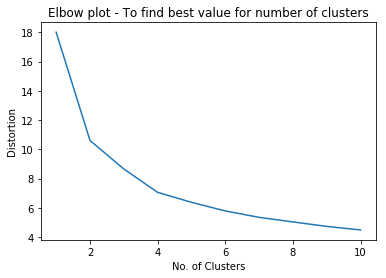

In [16]:
plt.title("Elbow plot - To find best value for number of clusters")
plt.xlabel("No. of Clusters")
plt.ylabel("Distortion")
plt.plot(K, distortions)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [17]:
# So looks like 4 is where Elbow bends. Hence optimal value of K = 3
optimum_clusters = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [18]:
model_kmean = KMeans(n_clusters=optimum_clusters).fit(X)
model_kmean.cluster_centers_ 

array([[ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-2.25338256e-01, -5.74342724e-01, -3.07614353e-01,
        -3.81865644e-02,  1.81774089e-01, -1.72461386e-01,
        -4.55562374e-01,  3.20123317e-01, -4.83943612e-01,
        -5.36605811e-01, -4.20567716e-01, -4.60232777e-01,
        -6.03827964e-01, -6.44323227e-01, -6.09955778e-02,
         4.54841126e-03,  8.24841721e-01,  7.07985111e-01],
       [-7.33024343e-01,  7.27349604e-02, -2.72170954e-01,
         2.94768327e+00,  6.83665190e+00,  8.69670551e+00,
        -5.35008001e-01,  4.66247771e-01, -5.57405972e-01,
         2.83410527e-01,  1.69752769e+00, -5.88068272e-01,
         2.12700856e-01,  4.96563826e+00, -2.74839440e

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [19]:
pd.DataFrame(columns=X.columns, data=model_kmean.cluster_centers_, index=[0, 1, 2, 3])

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
2,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651
3,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [20]:
# Just printing a few of the labels to save space, not all.
model_kmean.labels_[0:50]

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 0,
       1, 3, 0, 0, 3, 1, 1, 1, 0, 1, 3, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 3,
       3, 1, 3, 1, 0, 1])

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [21]:
np.random.seed(12)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [22]:
a[0:10]

array([[ 9.63974973,  1.41752989],
       [ 8.04107097,  1.8231488 ],
       [ 8.83600507,  2.62201953],
       [ 9.8479501 ,  0.10692431],
       [12.8585942 , -3.80535065],
       [ 9.94486504, -1.47617806],
       [ 9.6428356 ,  2.98940472],
       [11.35619583,  2.55295983],
       [ 9.94413128,  2.59240139],
       [10.42515762, -2.86361804]])

In [23]:
len(a), len(b), len(c)

(100, 50, 100)

### 9. Combine all three arrays a,b,c into a dataframe

In [24]:
X = np.concatenate((a, b, c))

In [25]:
len(X)

250

### 10. Use scatter matrix to print all the 3 distributions

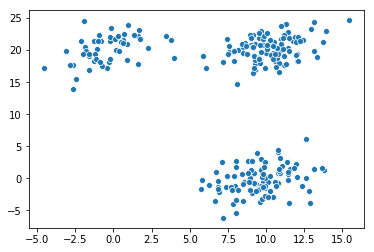

In [26]:
sns.scatterplot(x=X[:,0], y=X[:,1])

### 11. Find out the linkage matrix

In [27]:
Z = linkage(X, 'ward', metric='euclidean')

Use ward as linkage metric and distance as Eucledian

In [28]:
# Column#1, Column#2, Column#3, Column4
# Index of First cluster, Index of Second Cluster, Distance between these two clusters, No of elements after merge of these two clusters
# Observe that last step has 150 elements, which means in final step all the elements merge into a single cluster
Z

array([[1.57000000e+02, 2.23000000e+02, 4.72306104e-02, 2.00000000e+00],
       [1.99000000e+02, 2.28000000e+02, 4.79218391e-02, 2.00000000e+00],
       [1.60000000e+01, 8.80000000e+01, 5.99106024e-02, 2.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 6.62247756e-02, 2.00000000e+00],
       [0.00000000e+00, 5.70000000e+01, 7.79038288e-02, 2.00000000e+00],
       [2.45000000e+02, 2.50000000e+02, 9.97747575e-02, 3.00000000e+00],
       [4.60000000e+01, 6.90000000e+01, 1.12568583e-01, 2.00000000e+00],
       [1.61000000e+02, 2.22000000e+02, 1.16988330e-01, 2.00000000e+00],
       [1.67000000e+02, 2.24000000e+02, 1.23365579e-01, 2.00000000e+00],
       [2.90000000e+01, 2.53000000e+02, 1.25600455e-01, 3.00000000e+00],
       [5.00000000e+01, 8.90000000e+01, 1.28696990e-01, 2.00000000e+00],
       [6.20000000e+01, 9.80000000e+01, 1.32569037e-01, 2.00000000e+00],
       [1.63000000e+02, 2.18000000e+02, 1.35392651e-01, 2.00000000e+00],
       [1.50000000e+01, 2.00000000e+01, 1.38965293e

In [29]:
len(Z)
# There are 250 elements in our data frame (X); hence there would be 250 - 1 = 249 steps performed.
# Result of each step can be found in Z

249

### 12. Plot the dendrogram for the consolidated dataframe

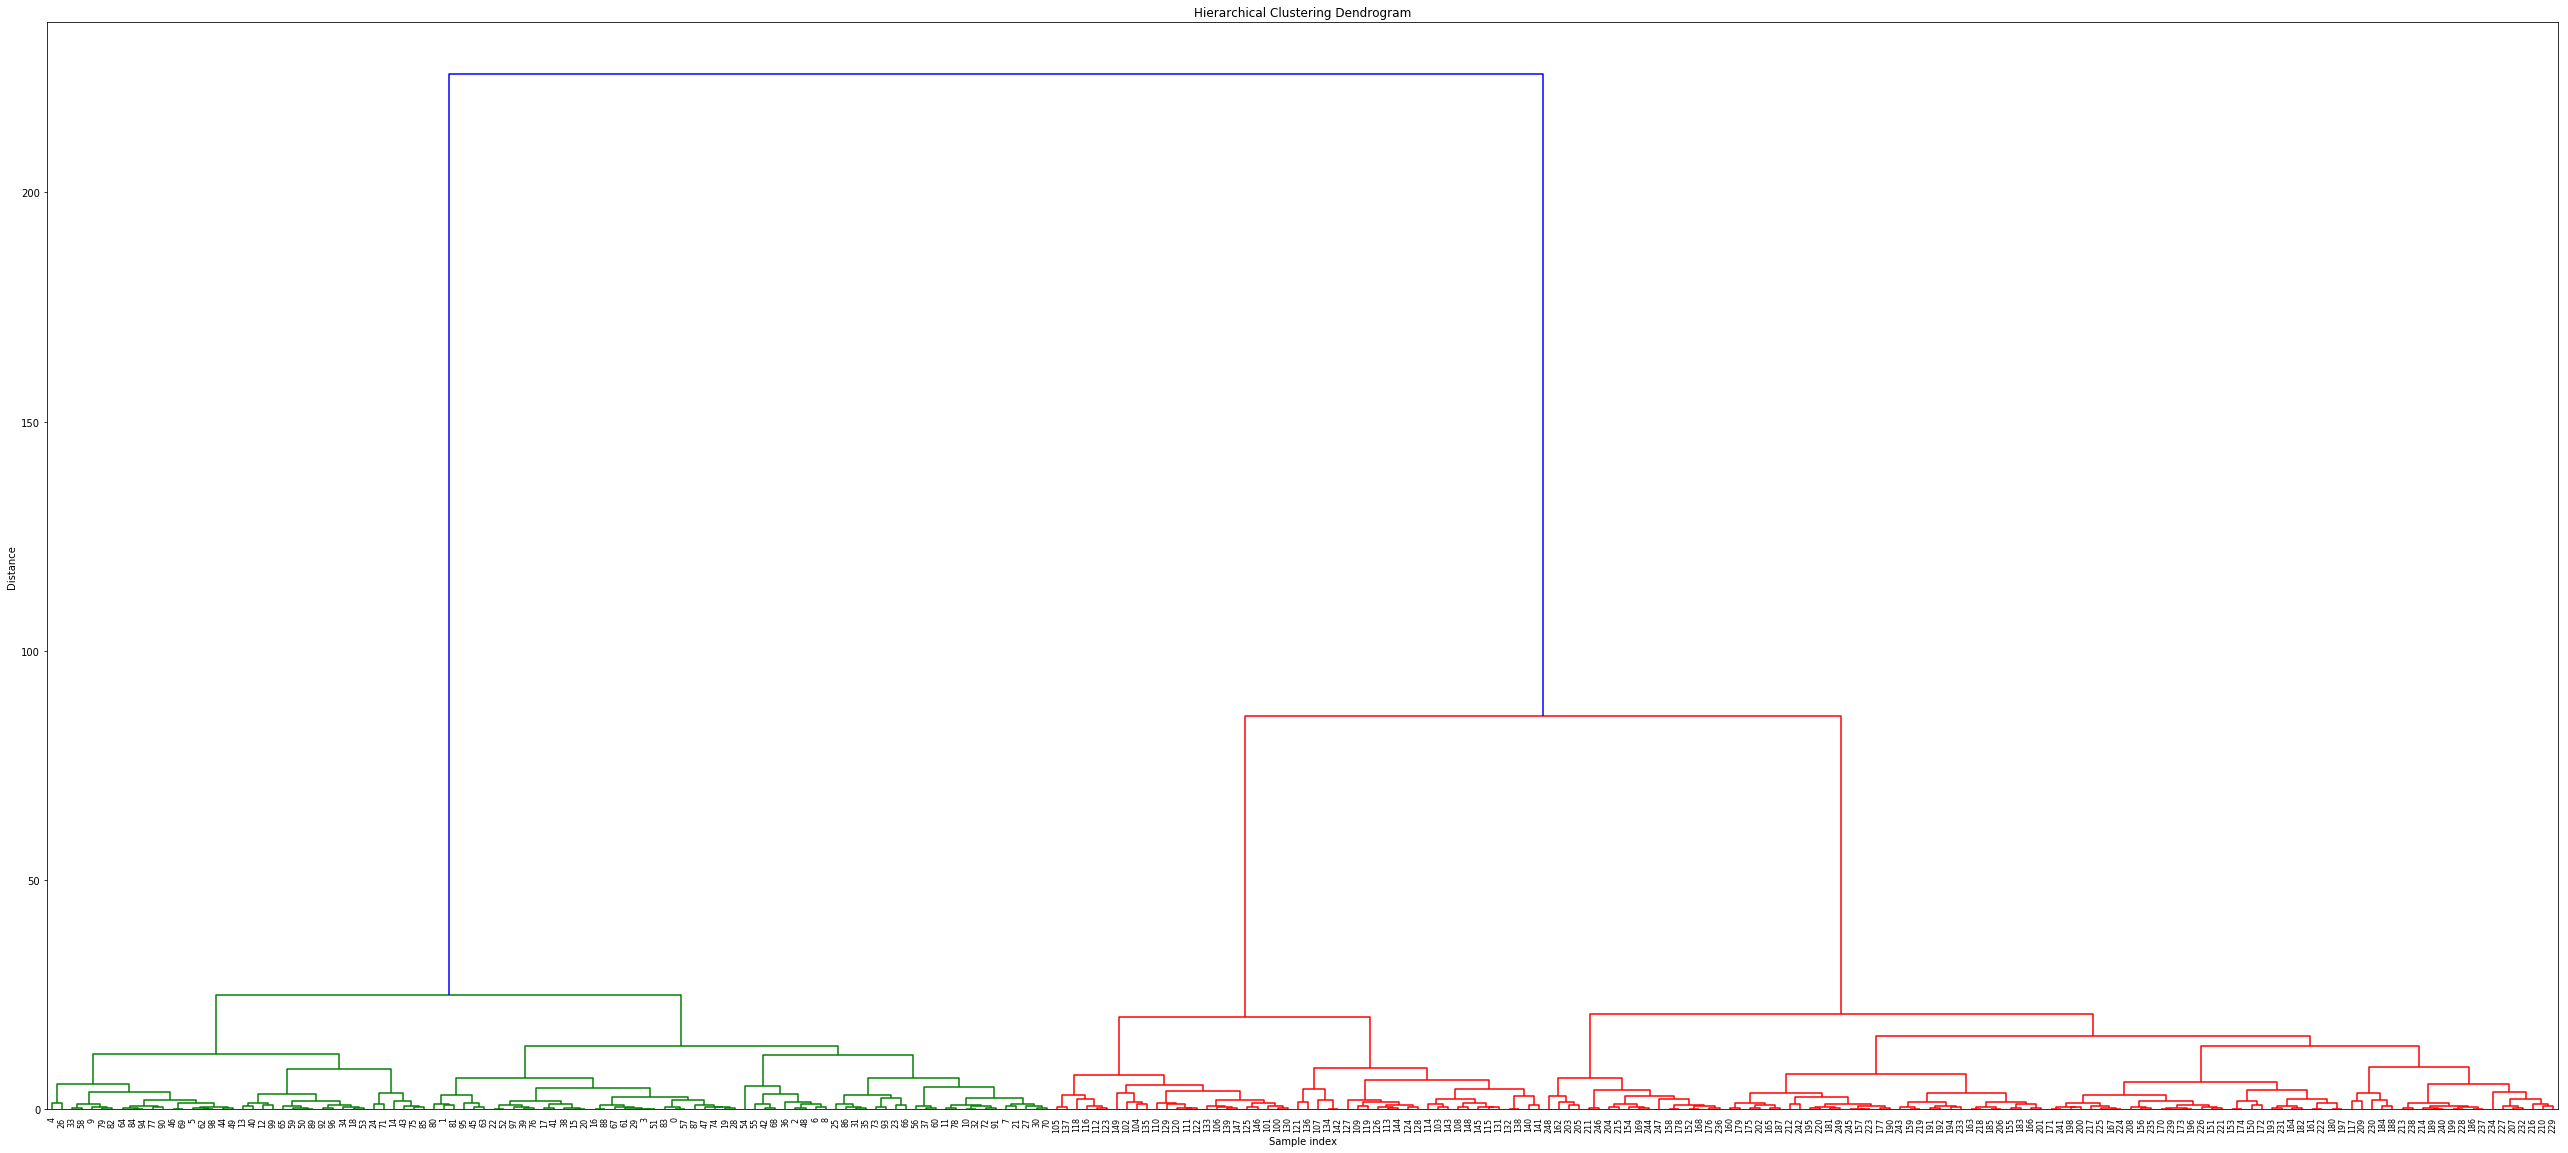

In [30]:
plt.figure(figsize=(45, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_leaf_counts = True
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

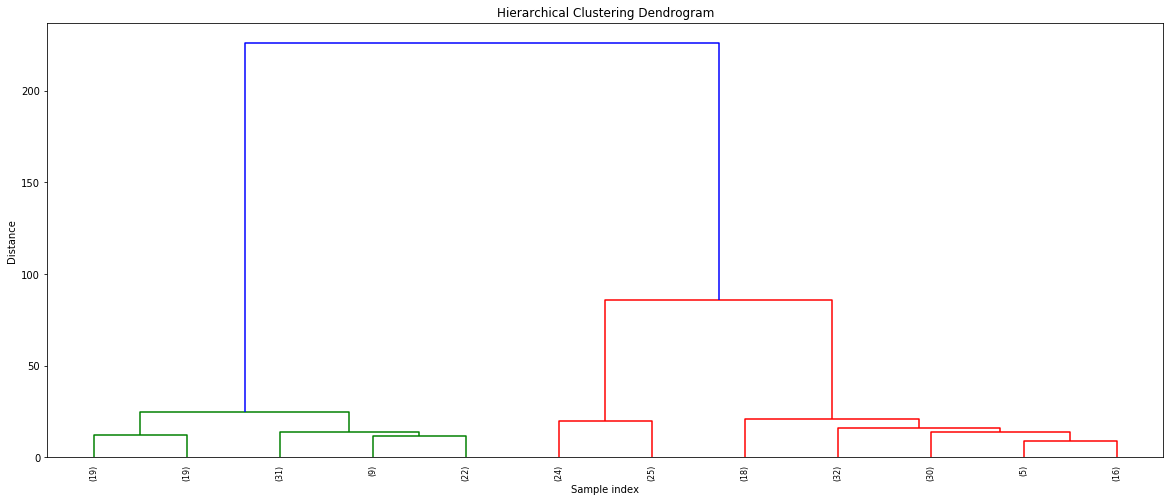

In [31]:
plt.figure(figsize=(20, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_leaf_counts = True,
    truncate_mode='lastp',
    p=12
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [32]:
# If we use optimal distance as 50, we should get 3 clean clusters. Two from the right side and one on the left side.
max_d = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [33]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

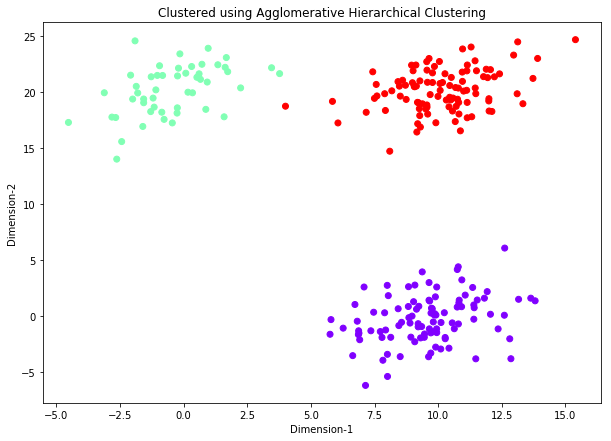

In [34]:
plt.figure(figsize=(10, 7))
plt.title("Clustered using Agglomerative Hierarchical Clustering")
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')  # plot points with cluster dependent colors
plt.show()